# **Dasar Pengolahan Citra dengan OpenCV dan Rasterio**

Pada pelajaran sebelumnya, kita telah pelajari mengenai bagaimana Google Colab dapat digunakan untuk menjalankan perintah-perintah Python pada baris-baris cell-nya. Pada latihan ini kita akan menggunakan beberapa modul Python yang berhubungan dengan pengolahan Citra: *OpenCV* dan *Rasterio*.

Materi praktikum pada minggu ini adalah sub-topik sebagai berikut:
- Mengenal Perangkat Pengolahan Citra: OpenCV dan Rasterio
- Memahami struktur data citra
- Mengenal format Data Citra: COG
- Menghitung Statistik Citra
- Menampilkan histogram dan diagram pencar (*scatter plot*) dari data citra satelit

## *Dasar-dasar Citra dan Computer Vision dengan OpenCV*

### Persiapan Data

Sebagaimana dibahas pada [latihan sebelumnya](https://colab.research.google.com/github/danylaksono/OpenCV-PCD/blob/main/Minggu%201_%20Panduan%20Google%20Colab%20untuk%20PCD.ipynb), OpenCV merupakan salah satu modul Python yang digunakan untuk pengolahan citra pada *level rendah*. Maksudnya, OpenCV menyediakan fungsi-fungsi yang paling mendasar hingga cukup kompleks untuk pengolahan citra dalam *computer vision*. 

![](https://circuitdigest.com/sites/default/files/projectimage_tut/Real-Life-Object-Detection-Using-computer-vision-for-the-detection-of-face.jpg)


Pada latihan sebelumnya telah dibahas mengenai bagaimana menggunakan Google Colab sebagai sebuah console interactive Python (iPython) Notebook. Dengan Google Colab, kita dapat membuat sebuah notebook berisi serangkaian perintah dalam bahasa Python untuk menjalankan fungsi tertentu, termasuk pengolahan citra. Pada minggu ini akan dibahas secara khusus mengenai penggunaan OpenCV untuk melakukan pengolahan citra sederhana.

Untuk latihan ini, pelajari kembali mengenai cara untuk mengunggah dan menggunakan berkas (misalnya file foto) pada Google Colab. Cara lain yang dapat dilakukan adalah dengan menggunakan fungsi *upload file* pada Google Colab. Untuk latihan ini, unggah file '**orange.jpg**' dari link berikut:


https://drive.google.com/uc?id=1kc8QA4GIHqaQusFlcGd91cUNnb3nr7GU




In [ ]:
# upload file yang sudah diunduh
# file akan disimpan sesuai dengan nama file yang diunggah
from google.colab import files
file = files.upload()

Saving orange.jpg to orange.jpg


Setelah mengunggah file '**orange.jpg**' ke tombol di atas, kita dapat lakukan cek untuk memeriksa isi dari folder saat ini. perintah `ls` merupakan perintah Linux untuk keperluan ini.

In [ ]:
!ls

orange.jpg  sample_data


Dapat kita lihat bahwa file 'orange.jpg' telah berhasil diunggah pada folder tempat Google Colab ini dijalankan. Selanjutnya, kita dapat memanggil file tersebut untuk pengolahan dengan OpenCV.

### Menggunakan OpenCV

Untuk menggunakan OpenCV, kita akan memanggil fungsi **cv2** dari library OpenCV versi 4 yang sudah tersedia pada Google Colab. Untuk itu, kita tidak perlu melakukan instalasi modul ini menggunakan perintah `pip` seperti yang kita lakukan pada modul **rasterio** di latihan sebelumnya. Kita langsung dapat memanggil modul-modul **cv2** menggunakan perintah:

```
import cv2
```

Khusus untuk penggunaan OpenCV di Google Colab, terdapat satu fungsi yang memerlukan *patch* atau perbaikan, yaitu ```cv2.imshow()```. Fungsi ini digunakan untuk menampilkan gambar pada OpenCV. Di Google Colab, fungsi ini digantikan dengan baris perintah berikut:

``` from google.colab.patches import cv2_imshow ```

selanjutnya fungsi ```cv2.imshow()``` digantikan dengan fungsi ```cv2_imshow()```.

Untuk mencoba, jalankan baris perintah berikut:


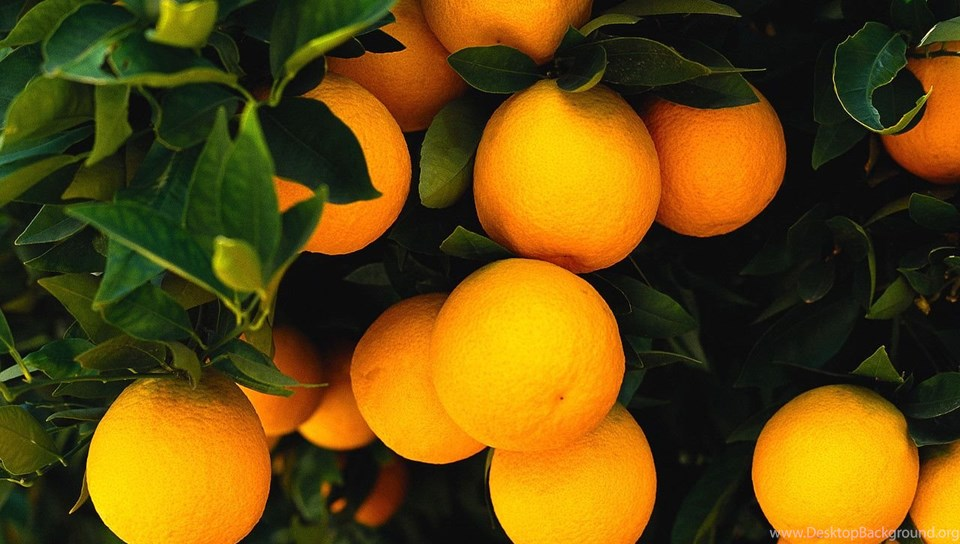

<class 'numpy.ndarray'>


In [ ]:
# memanggil library opencv
import cv2

# memanggil fungsi google colab untuk perbaikan cv2.imshow
from google.colab.patches import cv2_imshow

# menyimpan gambar dengan fungsi imread dari OpenCV
img = cv2.imread("orange.jpg")  
# sesuaikan dengan nama file yang diunggah pada cell sebelumnya

# menampilkan gambar dengan fungsi cv2_imshow
cv2_imshow(img)

# lihat tipe data img. disimpan sebagai apa?
print(type(img))





**Keterangan:**

*import*	adalah fungsi Python untuk memanggil modul di luar fungsi dasar yang disediakan

*cv2*	adalah nama modul Python yang digunakan untuk memanggil fungsi-fungsi OpenCV

*numpy*	modul Python untuk pengolahan matriks (ingat bahwa citra pada OpenCV dianggap sebagai matrix)
matplotlib	modul Python untuk melakukan fungsi plotting

*cv2.imread*	perintah yang digunakan pada modul cv2 untuk memanggil citra

*cv2_imshow*	perintah yang digunakan pada modul cv2 untuk menampilkan citra. Argumen yang diperlukan adalah nama  citra yang dipanggil

Perintah di atas menggunakan *cv2.imread* untuk memanggil citra. Pada script di atas, 

```img = cv2.imread('orange.jpg')```

menunjukkan bahwa citra ‘orange.jpg’ disimpan pada variable bernama ```img```.

Selain fungsi **imshow** di atas, dapat digunakan juga Matplotlib untuk menampilkan gambar. Kode yang digunakan adalah ```plt.imshow()``` dengan terlebih dulu memanggil fungsi ```plt``` dari library Matplotlib:


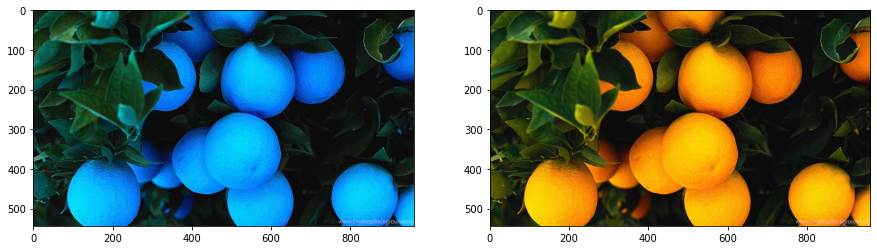

In [ ]:
# memanggil fungsi plt dari matplotlib
from matplotlib import pyplot as plt

# membuat sebuah variabel kosong 'fig'
fig = plt.figure()
fig.add_subplot(121)
# subplot (jumlah baris, jumlah kolom, urutan)

# menampilkan gambar dengan fungsi plt
plt.imshow(img)

# plotting gambar
fig.add_subplot(122)
# subplot, formatnya: (jumlah baris, jumlah kolom, urutan)
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)


plt.show() #untuk menampilkan plot


> **Pertanyaan**: Mengapa warnanya berubah jadi biru?

Beberapa perintah lain yang dapat digunakan untuk mengakses properti citra ```img``` adalah:

In [ ]:
print(img.shape) #menampilkan resolusi
print(img.size) #menampilkan ukuran data pada media penyimpan
print(img.dtype) #image datatype (kedalaman bit) 


(544, 960, 3)
1566720
uint8


Demikian pula operasi-operasi matriks lainnya dapat diterapkan pada citra yang sudah dipanggil. Untuk detilnya silahkan merujuk Dokumentasi OpenCV


### Ekstraksi Band

Sebuah citra dapat dipecah pada band penyusunnya dengan menggunakan perintah ```cv2.split()```.

In [ ]:
# Band blue, green dan red masng-masing disimpan pada variabel b,g,r
b, g, r = cv2.split(img)

atau bisa juga dengan menggunakan operasi index pada matriks img:

In [ ]:
b = img[...,0]  # blue channel
g = img[...,1]  # green channel
r = img[...,2]  # red channel




Perhatikan bagaimana tiap band disusun pada variabel yang menyimpan gambar: *masing-masing band disusun sebagai sebuah array di dalam array*. Ingat bahwa pada Python, index sebuah array **dimulai dari angka nol**. 

Selanjutnya masing-masing band dapat ditampilkan dengan menggunakan ```cv2_imshow``` atau ```plt.imshow```:

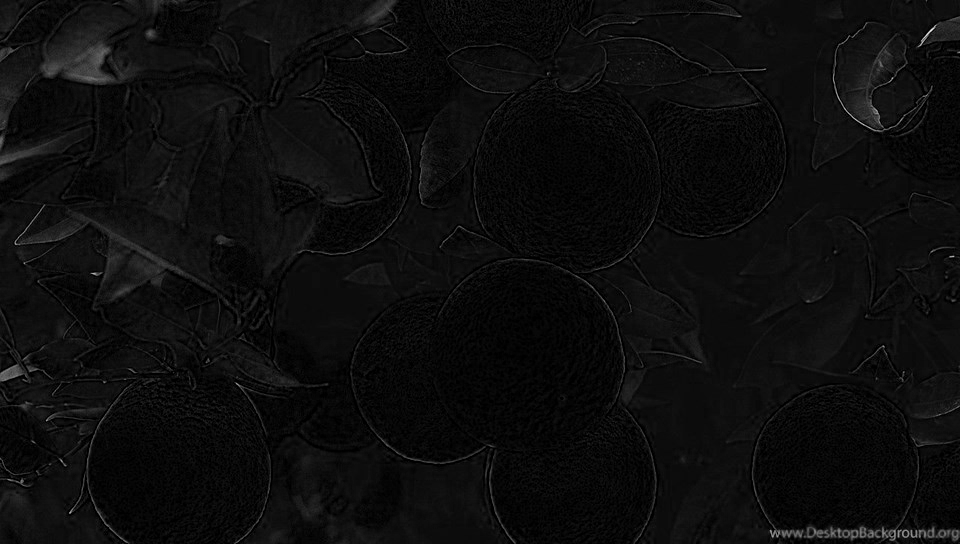

In [ ]:
cv2_imshow(b); # menampilkan band biru

Cobalah latihan yang sama dengan menggunakan band lain. Bagaimana tampilan dari masing-masing citra? apa perbedaannya?

### Transformasi Colorspace

Citra pada OpenCV disimpan dalam susunan BGR (*Blue, Green, Red*). Adakalanya untuk berbagai keperluan perlu dilakukan transformasi colorspace BGR menjadi format lain, misalnya HSV (*Hue Saturation Value*). Penggunaan Colorspace HSV bertujuan untuk mendekati bagaimana cara mata manusia mengenali warna. Contoh penggunaannya adalah untuk melakukan ekstraksi objek berdasarkan warna dan kecerahannya.

> Pelajaran yang dapat diambil adalah bahwa tiap program pengolah citra dapat memiliki susunan *colorspace* yang berbeda. Perhatikan bagaimana pengaruh susunan band ini terhadap komposit citra yang dihasilkan

Fungsi yang digunakan untuk melakukan transformasi adalah ```cv2.cvtColor()```




In [ ]:
# konversi BGR dari variable img ke colorspace HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV);

Fungsi di atas mentransformasi citra 'img' ke dalam kelas warna HSV menggunakan fungsi COLOR_BGR2HSV. Untuk fungsi transformasi lain silahkan merujuk dokumentasi OpenCV.
Hasil konversi juga dapat dipecah ke dalam masing-masing band:


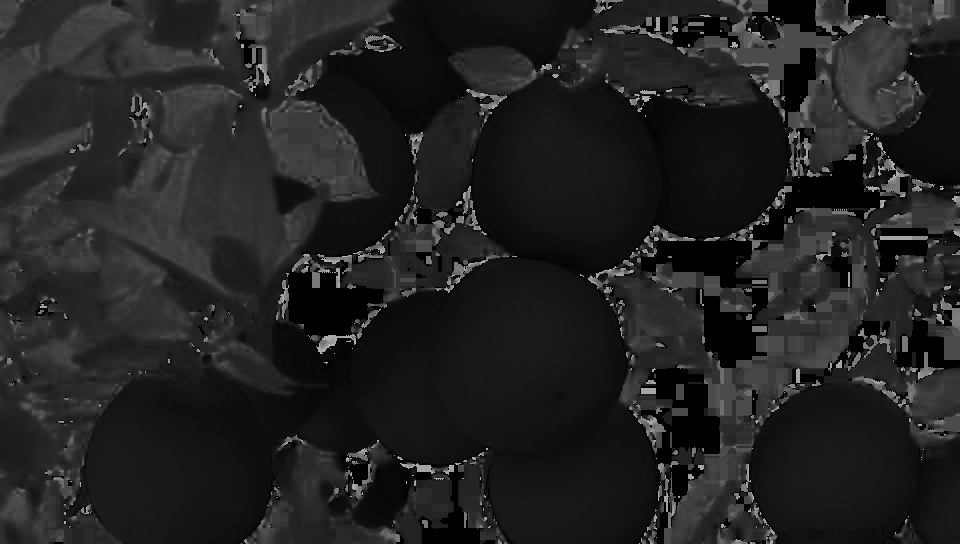

In [ ]:
# memisahkan hue, saturation dan value
h, s, v = cv2.split(hsv)

# menampilkan band hue
cv2_imshow(h)

Hasil di atas adalah visualisasi untuk band Hue. Bagaimana tampilan dari Band lain?

### Menampilkan Histogram Citra

Histogram dapat ditampilkan dengan menggunakan banyak cara. Fungsi yang dapat digunakan antara lain ```cv2.calcHist()```, ```np.histogram()``` dan ```plt.hist()```.

Adapun parameter untuk fungsi cv2.calcHist() adalah sebagai berikut:

```cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])```

* images : gambar yang dibaca menggunakan fungsi cv.read dengan type uint8 or float32. Gambar ini harus dinyatakan sebagai sebuah array dengan kurung siku "[img]".
* channels : band yang akan dihitung histogramnya. Gunakan [0] untuk citra *grayscale*. Untuk citra berwarna, kita dapat berikan nilai [0], [1] atau [2] untuk menghitung histogram dari masing-masing band.
* mask : digunakan apabila kita ingin memperoleh histogram dari sebagian citra saja. 
* histSize : Ukuran histogram, atau banyaknya kolom yang digambar. Kita dapat gunakan nilai sesuai dengan jumlah pixel [256].
* ranges : rentang nilai. Pada citra 8 bit, nilainya adalah [0,256].

Baca pada [rujukan berikut](https://docs.opencv.org/master/d1/db7/tutorial_py_histogram_begins.html) untuk lebih lengkapnya


Berikut adalah contoh kode untuk memanggil histogram:


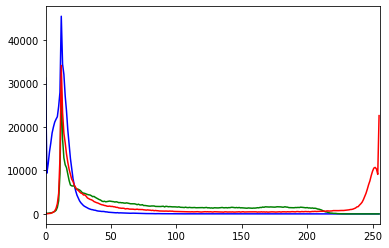

In [ ]:
# memanggil library yang dibutuhkan
import cv2
import numpy as np
from matplotlib import pyplot as plt

# jika file baymax.jpg yang digunakan, hilangkan tanda komentar
# img = cv2.imread(‘Baymax.jpg')

color = ('b','g','r')
for i,col in enumerate(color):
  histr = cv2.calcHist([img],[i],None,[256],[0,256])
  plt.plot(histr,color = col)
  plt.xlim([0,256])
plt.show()




Pada fungsi di atas, ```cv2.calcHist()``` digunakan untuk menghitung histogram, sedangkan ```plt.plot()``` digunakan untuk menampilkan histogram yang telah dihitung. Fungsi for adalah perulangan (loop) pada Python.

Berikut contoh plotting dengan pyplot:

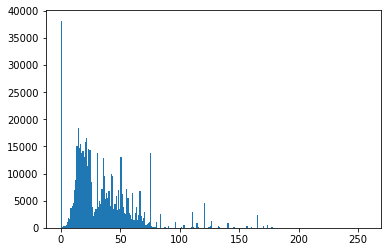

In [ ]:
# plotting menggunakan fungsi histogram dari pyplot
# ravel() adalah fungsi numpy untuk mengkonversi array menjadi flat array

# h.ravel() -> menampilkan histogram untuk band Hue (dari variabel pada cell sebelumnya)

plt.hist(h.ravel(),256,[0,256]); 

plt.show()

Histogram pada citra dapat kita gunakan untuk melihat secara cepat distribusi dari nilai pixel pada sebuah citra. Apabila di atas kita menggunakan gambar biasa, kita juga dapat menggunakan citra satelit untuk keperluan tersebut. Pembahasannya akan diberikan pada bagian Rasterio di bawah panduan ini.

### Contoh Kasus: Ekstraksi Objek dengan warna menggunakan OpenCV

Salah satu contoh penggunaan ekstraksi warna adalah untuk memisahkan objek berdasarkan warnanya. Coba lakukan latihan berikut untuk memahami penggunaannya.

![](https://htmlcolors.com/img/colorhsvprincipal.png)


Jika Anda bertanya-tanya mengapa kita perlu melakukan transformasi colospace, maka gambar di atas adalah jawabannya. Pada colorspace HSV, kita dapat memisahkan objek berdasarkan warnanya: Band Hue sendiri telah mewakili seluruh warna yang ada. Jika kita memilih nilai tertentu dari rentang warna ini, kita dapat dengan mudah melakukan ekstraksi objek berdasarkan warnanya.

Sebagai referensi, berikut adalah rentang warna pada band Hue:

![Rentang Hue](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/HueScale.svg/360px-HueScale.svg.png)

Untuk memilih objek jeruk dari gambar di atas, kita dapat lakukan seleksi pada band hue dari nilai piksel yang mendekati warna orange pada jeruk, yaitu antara 5-72. Pada kode di bawah, kita menggunakan fungsi *widget* yang disediakan oleh Google Colab untuk membuat seleksi nilai hue ini dapat dilakukan secara otomatis.



gambar asal


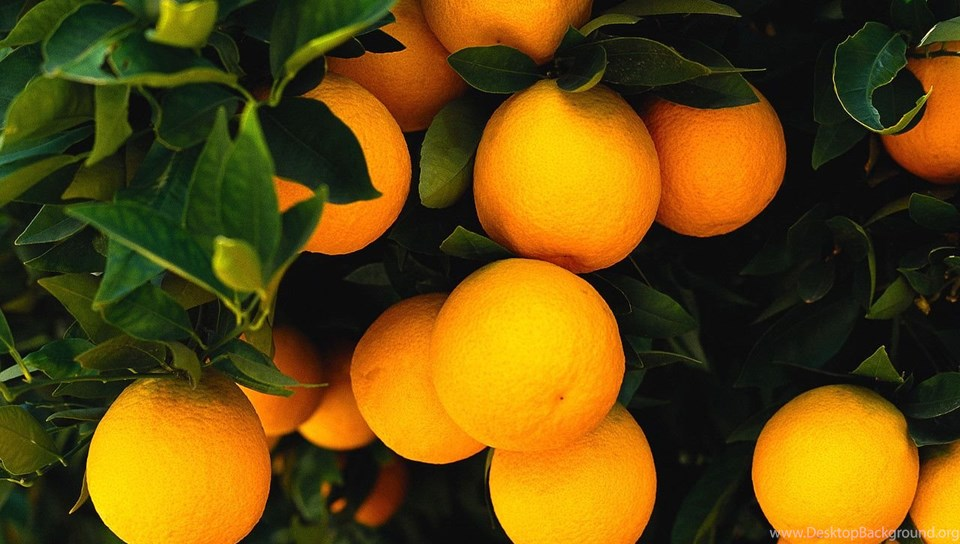

masking warna


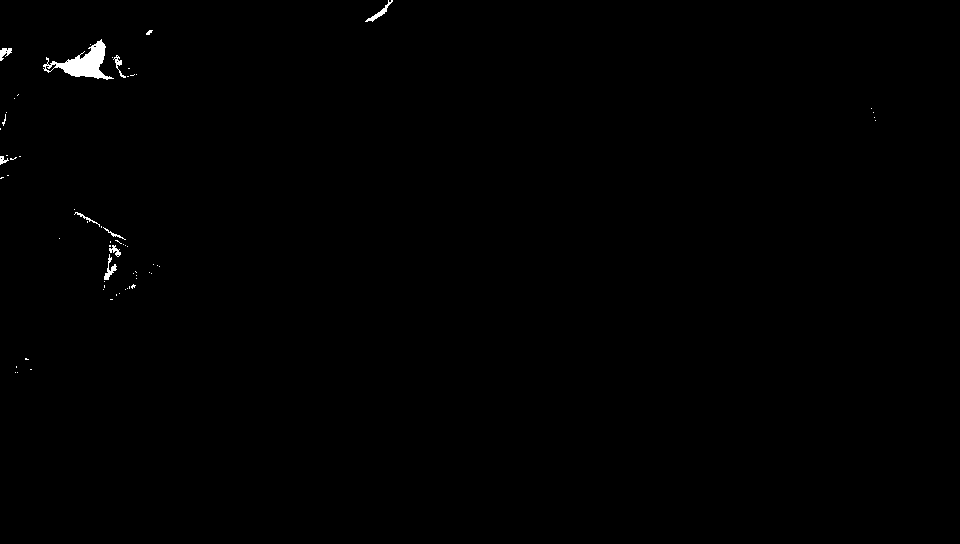

hasil operasi


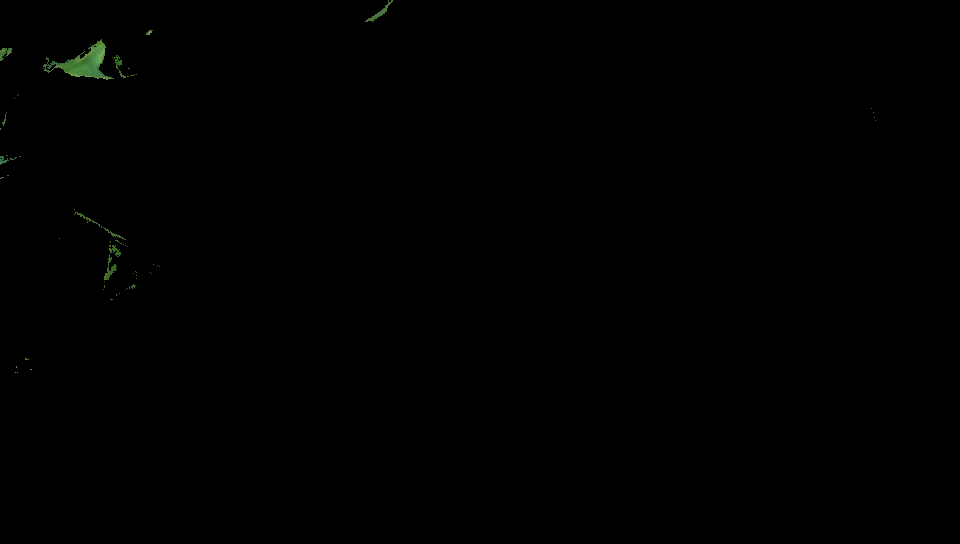

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Membaca citra 'orange.jpg' yang sudah diunggah sebelumnya.
img = cv2.imread('orange.jpg')


hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV);

# slider adalah salah satu fungsi Google Colab
# 3 dan 27 adalah batas warna orange pada band hue
# rubah slider untuk mencoba hasil akhir yang berbeda
batas_bawah = 46 #@param {type:"slider", min:0, max:360, step:1}
batas_atas = 78 #@param {type:"slider", min:0, max:360, step:1}

# definisi batas warna orange. perhatikan variabel batas_bawah dan batas_atas
lower_orange = np.array([batas_bawah,100,100])
upper_orange = np.array([batas_atas,255,255])

# membuat masking untuk mencari objek sesuai batas warna
mask = cv2.inRange(hsv, lower_orange, upper_orange)

# Operasi Bitwise-AND 
res = cv2.bitwise_and(img, img, mask=mask)

# cetak hasil ke layar
print("gambar asal")
cv2_imshow(img);

print("masking warna")
cv2_imshow(mask)

print("hasil operasi")
cv2_imshow(res)




Untuk mendapatkan kelas warna BGR ke HSV, kita dapat menggunakan fungsi konversi sederhana. Misalnya dengan menggunakan fungsi berikut:


In [ ]:
# warna hijau (RGB green = 0, 255, 0)
ijo = np.uint8([[[0,255,0 ]]])

# konversi ke HSV
hsv_ijo = cv2.cvtColor(ijo,cv2.COLOR_BGR2HSV)
print(hsv_ijo)

[[[ 60 255 255]]]


Warna hijau pada kelas BGR didefinisikan sebagai [0 255 0]. Fungsi tersebut memperoleh padanan untuk warna hijau tersebut di kelas HSV adalah [60 255 255]. Untuk menentukan batas atas dan batas bawah dapat digunakan rumus [H-10, 100,100] dan [H+10, 255, 255] atau sesuai dengan kebutuhan.

Sebagai latihan, gunakan gambar lain untuk keperluan ekstraksi. Lakukan eksperimen dengan beragam kelas warna dan hasil ekstraksinya. Apakah objek yang Anda inginkan berhasil diekstrak dengan baik?

---


## *Mengolah Citra Satelit dengan Rasterio*

Pada latihan di atas, kita telah menggunakan OpenCV untuk mendemonstrasikan bagaimana komputer menyimpan struktur data citra serta bagaimana melakukan operasi dasar pada warna dan susunan nilai piksel dari citra tersebut. Dengan teknik transformasi colorspace sederhana kita dapat melakukan ekstraksi objek berdasarkan warnanya. Ini adalah pekerjaan yang banyak kita jumpai pada pekerjaan remote sensing maupun fotogrametri: kita menggunakan komputer untuk mengenali objek tertentu yang kita inginkan.

Pada bagian ini kita akan menggunakan modul Python lain yang dapat digunakan untuk mengolah citra, yaitu **Rasterio**. Modul ini banyak digunakan dalam pengolahan citra satelit penginderaan jauh, dan telah dilengkapi dengan berbagai fungsi yang cukup memadai untuk pengolahan citra sesuai kebutuhan kita. Selain Rasterio dan OpenCV, sebenarnya terdapat sangat banyak modul Python lain untuk berbagai keperluan, termasuk Machine Learning dan Deep Learning. Bagian ini akan menjelaskan fungsi sederhana saja dari apa yang dapat dilakukan oleh modul-modul ini, khususunya Rasterio.

### Menggunakan Cloud-Optimised GeoTIFF (COG)

Citra digital, khususnya citra satelit, datang dalam berbagai bentuk format data yang berbeda. Kegiatan pengolahan data citra satelit biasanya diawali dengan mengunduh terlebih dahulu data citra satelit tersebut, kemudian menggunakan berbagai perangkat lunak untuk mengolah data tersebut. 

Seiring perkembangan industri 4.0, berbagai perangkat lunak yang digunakan untuk pengolahan citra bergeser kepada penggunaan perangkat berbasis cloud, misalnya melalui Google Colab dengan Python dan OpenCV seperti yang kita gunakan saat ini. Demikian pula, penyedia data citra mulai menggunakan format data yang dapat dipanggil dan diolah melalui cloud, misalnya USGS yang saat ini telah menyediakan akses untuk data Landsat melalui cloud. Format data yang digunakan disebut dengan nama COG (Cloud-optimised GeoTIFF), yaitu format GeoTIFF yang selama ini kita kenal, tetapi dengan pengaturan tertentu pada server sehingga memungkinkan data tersebut untuk diakses dan diolah melalui cloud:

[![COG Landsat](http://img.youtube.com/vi/SmG_2t-J_1o/0.jpg)](https://www.youtube.com/watch?v=SmG_2t-J_1o "Landsat data On The Cloud")

Format COG ini dapat diakses dari berbagai portal. Berikut adalah beberapa diantaranya:

* https://apps.sentinel-hub.com/eo-browser/
* https://search.remotepixel.ca/
* https://landsatonaws.com/

Berikut adalah contoh bagaimana kita dapat memperoleh link pada kumpulan Band citra satelit yang disimpan sebagai COG pada server AWS:

![](https://www.sentinel-hub.com/img/eo_browser_00.png)


Setelah memperoleh link tersebut, kita dapat menggunakan Rasterio untuk mengolah citra dan memperoleh informasi. Contoh link yang kita peroleh adalah sebagai berikut:

http://landsat-pds.s3.amazonaws.com/c1/L8/111/067/LC08_L1TP_111067_20201119_20201210_01_T1/index.html

Selanjutnya, dari alamat tersebut kita akan dapat mengakses tiap band melalui link yang diberikan, sebagai contoh:

```
http://landsat-pds.s3.amazonaws.com/c1/L8/111/067/LC08_L1TP_111067_20201119_20201210_01_T1/LC08_L1TP_111067_20201119_20201210_01_T1_B4.TIF

```
Link di atas digunakan untuk memanggil Band 4 dari citra Landsat 8 yang dipanggil. Untuk mengakses band lain kita tinggal merubah bilangan band dari link tersebut (B1, B2, B3, dst).







### Menggunakan Rasterio untuk Membaca Data Citra Satelit

Pada bagian ini kita akan gunakan Rasterio untuk membaca citra satelit dari COG dari link citra Landsat di atas. Karena Rasterio belum tersedia pada Google Colab, kita perlu terlebih dahulu melakukan instalasi melalui `pip`.

In [ ]:
!pip install rasterio

     |████████████████████████████████| 19.1MB 1.4MB/s 


Pemanggilan citra telah kita berikan contohnya pada [latihan di minggu sebelumnya](https://colab.research.google.com/github/danylaksono/OpenCV-PCD/blob/main/Minggu%201_%20Panduan%20Google%20Colab%20untuk%20PCD.ipynb#scrollTo=JZFFyEdQkcX9). Untuk latihan ini kita gunakan alamat citra dari Band 4 pada citra Landsat di atas.

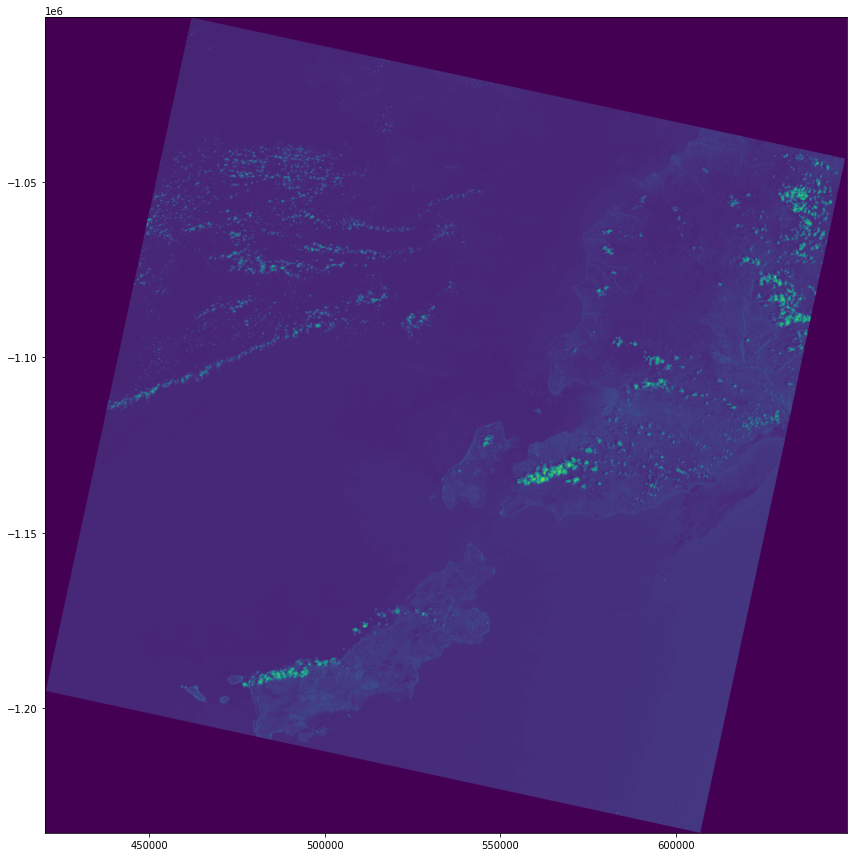

In [ ]:
# Memanggil modul rasterio yang sudah terinstall
# Dari Matplotlib, cukup ambil modul `pyplot`, yang digunakan untuk memperbesar 
# hasil plotting dari Rasterio
import rasterio
from matplotlib import pyplot as plt

# Format COG (Cloud Optimised Geotiff), dipanggil dari Citra Landsat 8 di AWS
alamat_citra = 'http://landsat-pds.s3.amazonaws.com/c1/L8/111/067/LC08_L1TP_111067_20201119_20201210_01_T1/LC08_L1TP_111067_20201119_20201210_01_T1_B4.TIF'
citra = rasterio.open(alamat_citra)

# perbesar ukuran hasil plotting
# fungsi plot pada Rasterio menggunakan Matplotlib, sehingga kita dapat 
# mengaturnya sebagaimana kita mengatur fungsi plot pada matplotlib.pyplot
plt.rcParams["figure.figsize"] = (15,15)

# Panggil submodul show pada rasterio, kemudian gunakan untuk menampilkan citra
# untuk menampilkan koordinat, gunakan parameter "transform" pada modul tersebut
from rasterio.plot import show
show(citra.read(), transform=citra.transform)

Sama seperti pada citra biasa, kita juga dapat melihat berbagai keterangan terkait dengan citra tersebut:

In [ ]:
# dimensi citra
print("Dimensi Citra: ", citra.shape)

# jumlah band
print("Jumlah Band: ", citra.count)

Dimensi Citra:  (7741, 7611)
Jumlah Band:  1


Berbeda dengan OpenCV yang hanya memiliki fungsi dasar OpenCV, Rasterio digunakan untuk menangani data spasial:

In [ ]:
# membaca Sistem Proyeksi
print("Sistem Proyeksi: ", citra.crs)

# bounding box
print(citra.bounds)

Sistem Proyeksi:  EPSG:32651
BoundingBox(left=420285.0, bottom=-1235415.0, right=648615.0, top=-1003185.0)


Demikian pula, kita dapat melihat profil dari citra yang kita panggil:

In [ ]:
citra.meta

{'count': 1,
 'crs': CRS.from_epsg(32651),
 'driver': 'GTiff',
 'dtype': 'uint16',
 'height': 7741,
 'nodata': None,
 'transform': Affine(30.0, 0.0, 420285.0,
       0.0, -30.0, -1003185.0),
 'width': 7611}

Rasterio dibangun berdasarkan Numpy. Kita dapat membaca isi dari matriks band ini sebagai berikut:

In [ ]:
# Apa tipe data dari band ini?
print(type(citra.read()))

# membaca isi citra sebagai Numpy array
citra.read([1])   # index rasterio dimulai dari 1



<class 'numpy.ndarray'>


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint16)

Selanjutnya, karena tiap band adalah sebuah matriks, maka kita dapat menghitung statistik citra dari band tersebut:

In [ ]:
# Menampilkan statistik citra. 
# Baik fungsi bawaan rasterio maupun Numpy dapat digunakan di sini

print("Statistik Band: ")
print("Min ", citra.read().min())
print("Max ", citra.read().max())
print("Mean ", citra.read().mean())
print("Median ", np.median(citra.read()))

Statistik Band: 
Min  0
Max  61295
Mean  5650.594154487575
Median  6745.0


### Memotong Citra COG 



Diantara keuntungan penggunaan COG adalah bahwa kita tidak perlu mengunduh terlebih dahulu citra tersebut, kemudian melakukan pengolahan. Kita dapat langsung menggunakan citra pada cloud, kemudian memilih lokasi yang kita inginkan untuk dianalisis. Fungsi `window` pada Rasterio digunakan untuk keperluan ini.

Text(0, 0.5, 'Row #')

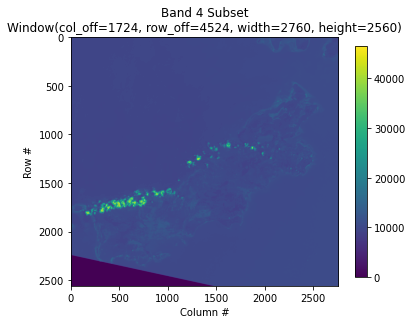

In [ ]:
#Window(col_off, row_off, width, height)
window = rasterio.windows.Window(1724, 4524, 2760, 2560)

with rasterio.open('http://landsat-pds.s3.amazonaws.com/c1/L8/111/067/LC08_L1TP_111067_20201119_20201210_01_T1/LC08_L1TP_111067_20201119_20201210_01_T1_B2.TIF') as src:
    subset = src.read(1, window=window)

plt.figure(figsize=(6,8.5))
plt.imshow(subset)
plt.colorbar(shrink=0.5)
plt.title(f'Band 4 Subset\n{window}')
plt.xlabel('Column #')
plt.ylabel('Row #')

Setelah memperoleh lokasi yang kita inginkan, kita dapat menerapkan fungsi tersebut untuk memotong susunan citra di lokasi yang sama. Fungsi berikut digunakan untuk melakukan hal tersebut

In [ ]:
nama_file = 'http://landsat-pds.s3.amazonaws.com/c1/L8/111/067/LC08_L1TP_111067_20201119_20201210_01_T1/LC08_L1TP_111067_20201119_20201210_01_T1_'

# array untuk menampung tiap band
array_mosaik = []

for n in range(1,7):
  # nama file ditambah 'Band 1.TIFF'
  file_dibuka = nama_file+'B'+ str(n) + '.TIF'
  print(file_dibuka)
  src = rasterio.open(file_dibuka).read(1, window=window)
  array_mosaik.append(src)


http://landsat-pds.s3.amazonaws.com/c1/L8/111/067/LC08_L1TP_111067_20201119_20201210_01_T1/LC08_L1TP_111067_20201119_20201210_01_T1_B1.TIF
http://landsat-pds.s3.amazonaws.com/c1/L8/111/067/LC08_L1TP_111067_20201119_20201210_01_T1/LC08_L1TP_111067_20201119_20201210_01_T1_B2.TIF
http://landsat-pds.s3.amazonaws.com/c1/L8/111/067/LC08_L1TP_111067_20201119_20201210_01_T1/LC08_L1TP_111067_20201119_20201210_01_T1_B3.TIF
http://landsat-pds.s3.amazonaws.com/c1/L8/111/067/LC08_L1TP_111067_20201119_20201210_01_T1/LC08_L1TP_111067_20201119_20201210_01_T1_B4.TIF
http://landsat-pds.s3.amazonaws.com/c1/L8/111/067/LC08_L1TP_111067_20201119_20201210_01_T1/LC08_L1TP_111067_20201119_20201210_01_T1_B5.TIF
http://landsat-pds.s3.amazonaws.com/c1/L8/111/067/LC08_L1TP_111067_20201119_20201210_01_T1/LC08_L1TP_111067_20201119_20201210_01_T1_B6.TIF


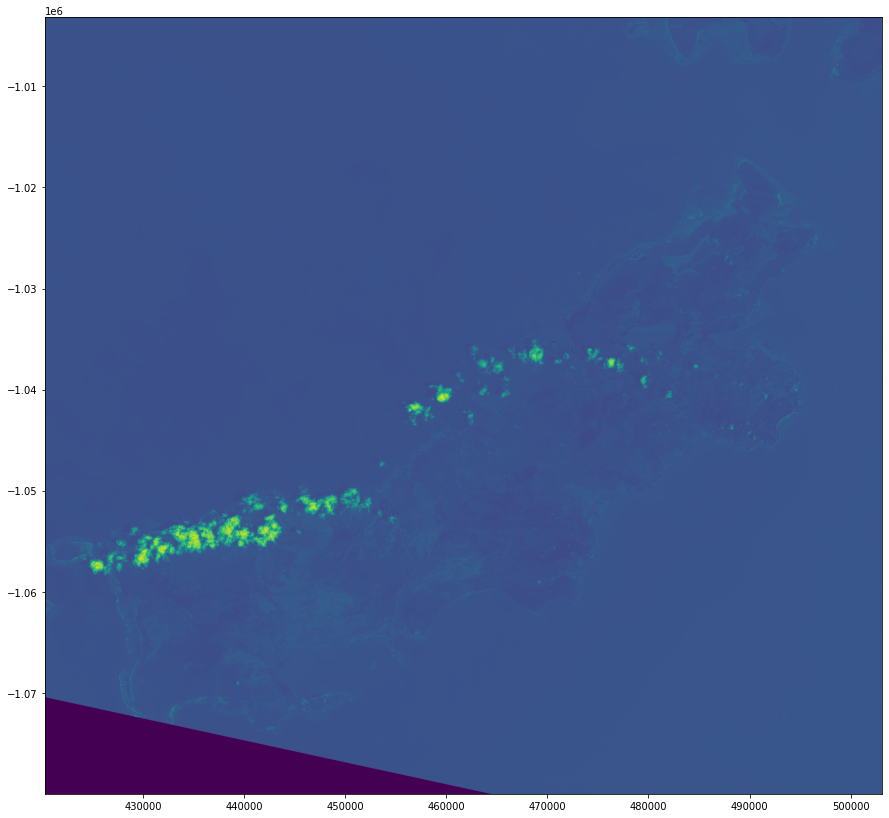

In [ ]:
# Bagaimana tampilan citra yang dipotong?
show(array_mosaik[0], transform=citra.transform)

In [ ]:
# isi array pada band pertama adalah:
array_mosaik[0].read()

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint16)

### Plotting Data Citra

Setelah dipotong, kita dapat menerapkan berbagai macam analisis pada citra ini. Sebagai contoh, berikut adalah plotting untuk [Taseled Cap](https://www.sjsu.edu/faculty/watkins/tassel.htm), salah satu cara penggambaran citra untuk klasifikasi.

![](https://upload.wikimedia.org/wikipedia/commons/f/f2/Tasseled_Cap_Transformation_for_bright_and_dark_soil.jpg)





Text(0.5, 1.0, 'Tasseled Cap')

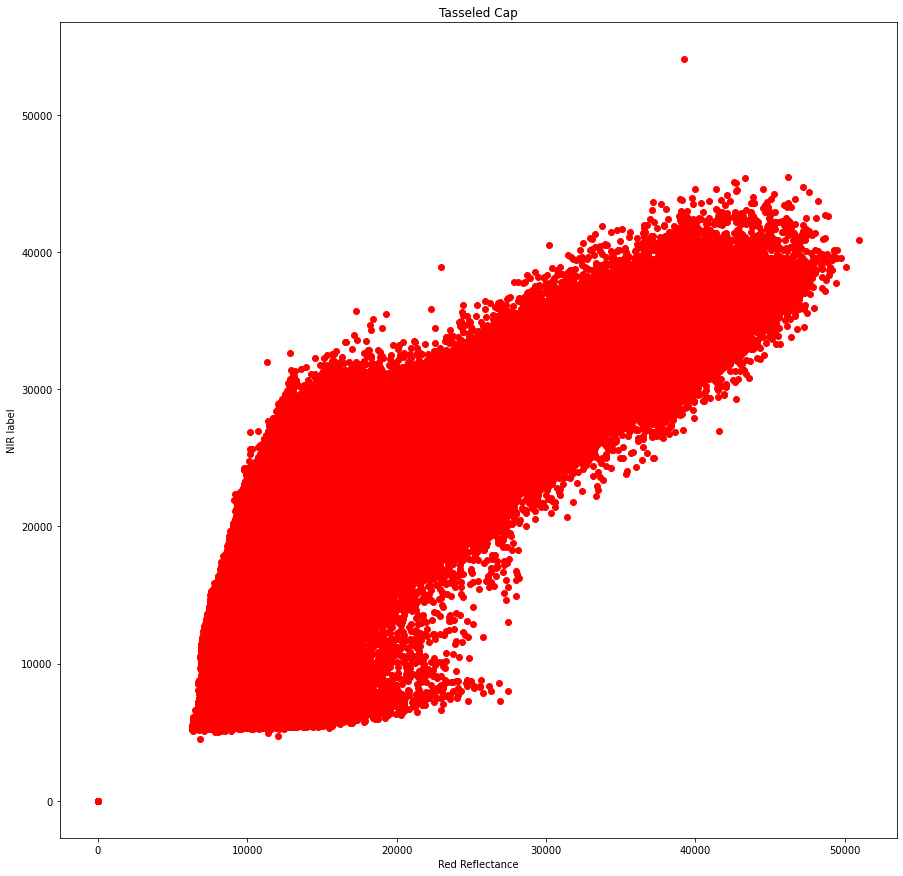

In [ ]:
fig, ax = plt.subplots()

red_flat = array_mosaik[3]
nir_flat = array_mosaik[4]

# Make the plot
ax.scatter(red_flat, nir_flat, color='r', marker='o')

# Add some axis labels
ax.set_xlabel('Red Reflectance')
ax.set_ylabel('NIR label')

# Add a title
ax.set_title('Tasseled Cap')

Text(0.5, 1.0, 'Histogram Band 4')

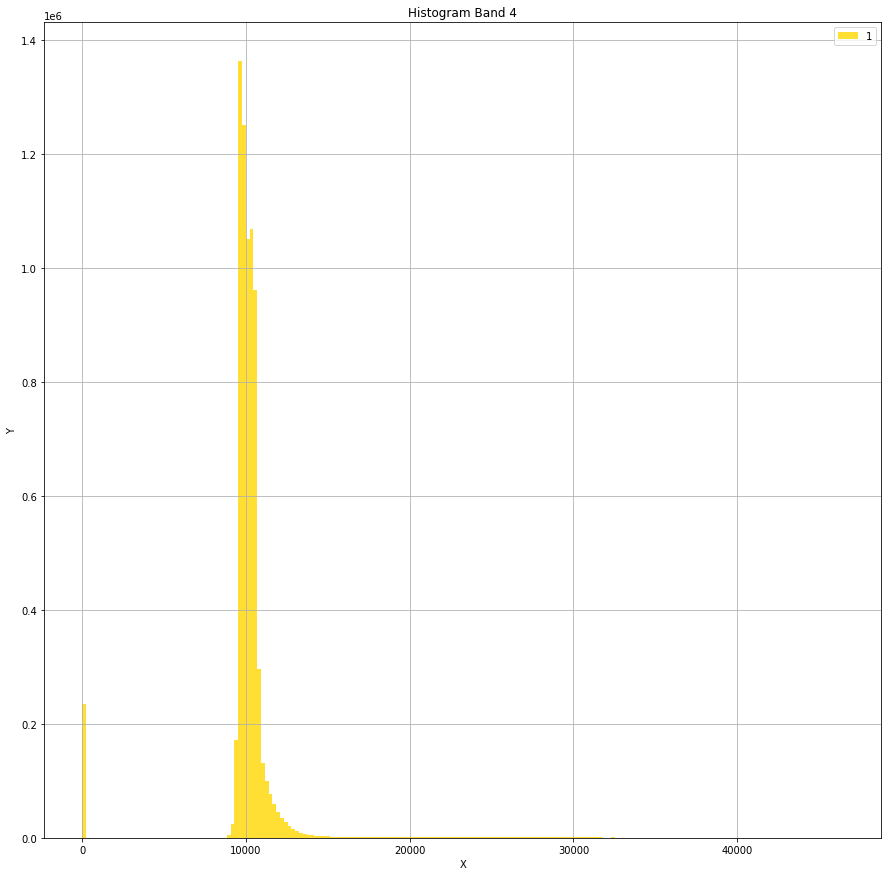

In [ ]:
from rasterio.plot import show_hist

hist_data = array_mosaik[1]

fig, axhist = plt.subplots(1, 1)
show_hist(hist_data, bins=200, histtype='stepfilled',
          lw=0.0, stacked=False, alpha=0.8, ax=axhist)
axhist.set_xlabel('X')
axhist.set_ylabel('Y')
axhist.set_title('Histogram Band 4')

## *Latihan*

Untuk latihan minggu 2 ini, kerjakan sebagai berikut:
1.	Carilah sembarang gambar (boleh dari internet atau memotret sendiri), kemudian dari gambar tersebut tampilkan dengan Python-OpenCV:
> *	Gambar asli dengan menggunakan cv2_imshow()
> *	Gambar asli dengan menggunakan Matplotlib
2.	Pada gambar no 1, lakukan konversi BGR ke HSV kemudian tampilkan sebagai berikut (boleh menggunakan Matplotlib atau cv2.imshow)
> *	Band Biru dari gambar 
> *	Band Hijau dari gambar 
> *	Band Merah dari gambar 
> *	Tampilkan histogram untuk Band Merah, Hijau dan Biru
> *	Band Hue
> *	Band Saturation
> *	Band Value
> * Histogram untuk band hue, saturation dan value

3.	Cari sembarang gambar (boleh menggunakan gambar untuk no 1 dan 2 atau gambar lain), kemudian lakukan ekstraksi objek sesuai metode yang telah ditunjukkan. Tunjukkan perbandingan gambar asli, masking dan gambar hasil ekstraksi. 

4. Cari data citra di lokasi rumah tinggal masing-masing, kemudian gunakan cara di atas untuk menampilkan histogram dan Tasseled-Cap dari citra tersebut. Gunakan data citra dari EOBrowser atau sumber lain.


## *Rujukan*

Rujukan-rujukan berikut dapat Anda gunakan untuk belajar lebih jauh mengenai pengolahan citra menggunakan Python.

* https://www.pyimagesearch.com/ 
* http://patrickgray.me/open-geo-tutorial/chapter_3_visualization.html
* https://automating-gis-processes.github.io/CSC/lessons/L6/overview.html
* https://automating-gis-processes.github.io/CSC/notebooks/L5/plotting-raster.html
* https://www.earthdatascience.org/courses/use-data-open-source-python/multispectral-remote-sensing/landsat-in-Python/
* https://atmamani.github.io/cheatsheets/open-geo/open-geo-raster-1/
* http://www.acgeospatial.co.uk/fastest-image-python/
* https://www.earthdatascience.org/courses/use-data-open-source-python/multispectral-remote-sensing/landsat-in-Python/landsat-exercises/


## hasil latihan